In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import csv
from io import StringIO

csv_content = """Layer,Depth,Classification,Vs,N
Layer 1,0.0,CLAY,155.61,5
Layer 1,1.0,CLAY,155.61,5
Layer 2,1.0,CLAY,165.03,5
Layer 2,1.5,CLAY,165.03,5
Layer 3,1.5,CLAY,121.07,4
Layer 3,2.0,CLAY,121.07,4
Layer 4,2.0,CLAY,121.07,7
Layer 4,2.5,CLAY,121.07,7
Layer 5,2.5,CLAY,201.22,5
Layer 5,3.0,CLAY,201.22,5
Layer 6,3.0,CLAY,165.03,5
Layer 6,3.5,CLAY,165.03,5
Layer 7,3.5,SAND,222.83,8
Layer 7,4.0,SAND,222.83,8
Layer 8,4.0,SAND,419.30,22
Layer 8,4.5,SAND,419.30,22
Layer 9,4.5,SAND,434.96,23
Layer 9,6.0,SAND,434.96,23
Layer 10,6.0,SAND,562.78,39
Layer 10,8.0,SAND,562.78,39
Layer 11,8.0,SAND,505.93,32
Layer 11,10.0,SAND,505.93,32
"""

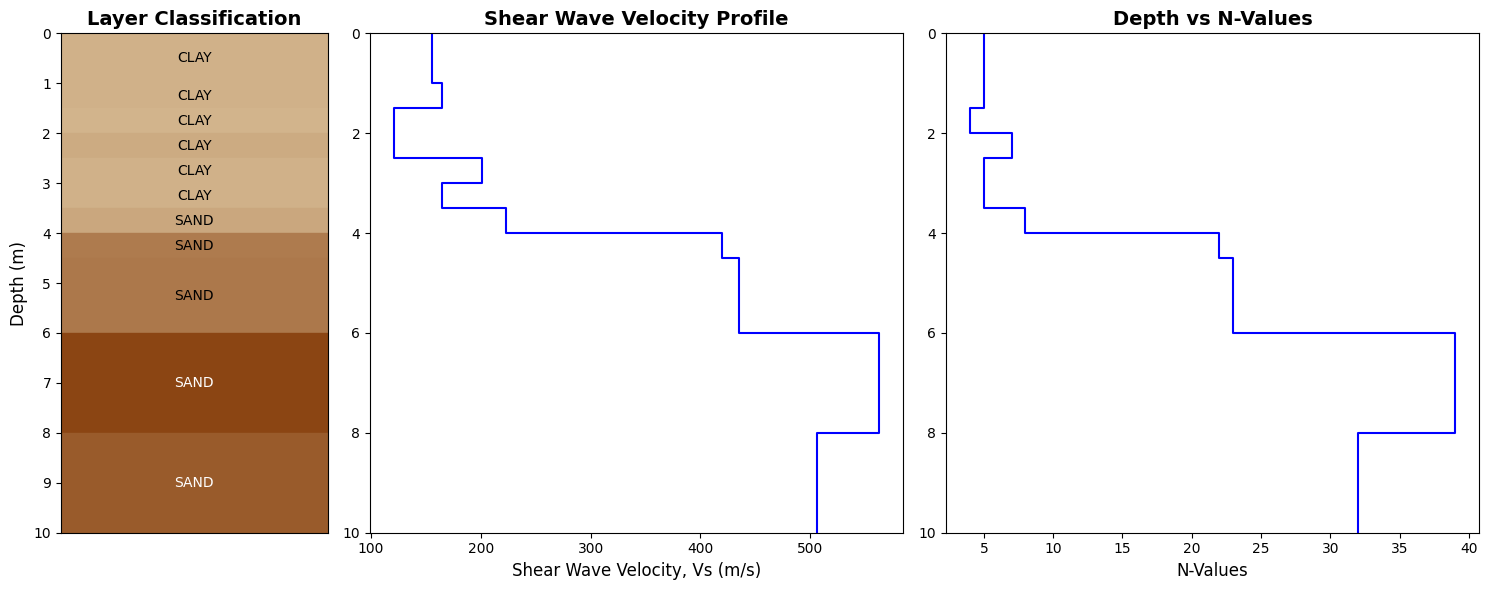

In [2]:
################################################################
# NO MARKRERS - PLOT LAYER CLASSIFICATION, SHEAR WAVE, N-VALUE #
################################################################

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import csv
from io import StringIO

def get_contrast_text_color(rgb_color):
    """
    Returns 'white' if the color is dark and 'black' if the color is light.
    
    Parameters:
      rgb_color: tuple of (r, g, b) values in the range 0-1.
    """
    brightness = 0.299 * rgb_color[0] + 0.587 * rgb_color[1] + 0.114 * rgb_color[2]
    return "white" if brightness < 0.5 else "black"

def plot_layer_classification(ax, layer_boundaries, layer_n, layer_classification):
    """
    Plots the layer classification as colored blocks along the depth axis.
    The fill color for each layer is determined solely by its N-value using a custom brown gradient.
    """
    # Normalize N-values for the colormap (lower N => lighter, higher N => darker)
    min_n = min(layer_n)
    max_n = max(layer_n)
    norm = mcolors.Normalize(min_n, max_n)
    
    # Create a custom brown colormap from light brown to dark brown.
    brown_cmap = LinearSegmentedColormap.from_list("brown_shades", ["#d2b48c", "#8B4513"])
    
    for (top, bottom), n_val, classification in zip(layer_boundaries, layer_n, layer_classification):
        layer_color = brown_cmap(norm(n_val))
        ax.fill_betweenx([top, bottom], 0, 1, color=layer_color)
        text_color = get_contrast_text_color(layer_color)
        mid_depth = (top + bottom) / 2
        ax.text(0.5, mid_depth, classification, fontsize=10, ha='center', va='center', color=text_color)
    
    # Set y-limits exactly to the topmost and bottommost depths
    overall_top = layer_boundaries[0][0]
    overall_bottom = layer_boundaries[-1][1]
    ax.set_ylim(overall_bottom, overall_top)
    ax.set_xlim(0, 1)
    ax.set_xticks([])
    
    # Generate y-ticks that go only from top to bottom (adjust step as needed)
    ax.set_yticks(np.arange(int(overall_top), int(overall_bottom) + 1, 1))
    
    ax.set_ylabel("Depth (m)", fontsize=12)
    ax.set_title("Layer Classification", fontsize=14, fontweight='bold')

def plot_shearwave_velocity(ax, depth, vs):
    """
    Plots the shear wave velocity profile as a step plot.
    No markers, extra vertical margins.
    """
    ax.step(vs, depth, where='post', color='blue', linestyle='-')
    # Reverse y-limits so depth increases downward
    ax.set_ylim(max(depth), min(depth))
    # Add extra space at the top/bottom
    ax.margins(y=0.1)
    
    ax.set_xlabel("Shear Wave Velocity, Vs (m/s)", fontsize=12)
    ax.set_title("Shear Wave Velocity Profile", fontsize=14, fontweight='bold')

def plot_n_values(ax, depth, n_values):
    """
    Plots the N-values as a step plot.
    No markers, extra vertical margins.
    """
    ax.step(n_values, depth, where='post', color='blue', linestyle='-')
    ax.set_ylim(max(depth), min(depth))
    ax.margins(y=0.1)
    
    ax.set_xlabel("N-Values", fontsize=12)
    ax.set_title("Depth vs N-Values", fontsize=14, fontweight='bold')

def main():
    # Assumes that 'csv_content' has been defined in a previous cell
    csv_file = StringIO(csv_content)
    reader = csv.DictReader(csv_file)
    csv_rows = list(reader)
    
    # Build arrays for the step plots
    depth_all = [float(row["Depth"]) for row in csv_rows]
    vs_all = [float(row["Vs"]) for row in csv_rows]
    n_all = [float(row["N"]) for row in csv_rows]
    
    # For the layer classification, assume each layer is defined by two rows
    layer_boundaries = []
    layer_n = []
    layer_classification = []
    for i in range(0, len(csv_rows), 2):
        top = float(csv_rows[i]["Depth"])
        bottom = float(csv_rows[i+1]["Depth"])
        layer_boundaries.append((top, bottom))
        layer_n.append(float(csv_rows[i]["N"]))
        layer_classification.append(csv_rows[i]["Classification"])
    
    # Create figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 2, 2]})
    
    # Plot each component
    plot_layer_classification(axes[0], layer_boundaries, layer_n, layer_classification)
    plot_shearwave_velocity(axes[1], depth_all, vs_all)
    plot_n_values(axes[2], depth_all, n_all)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

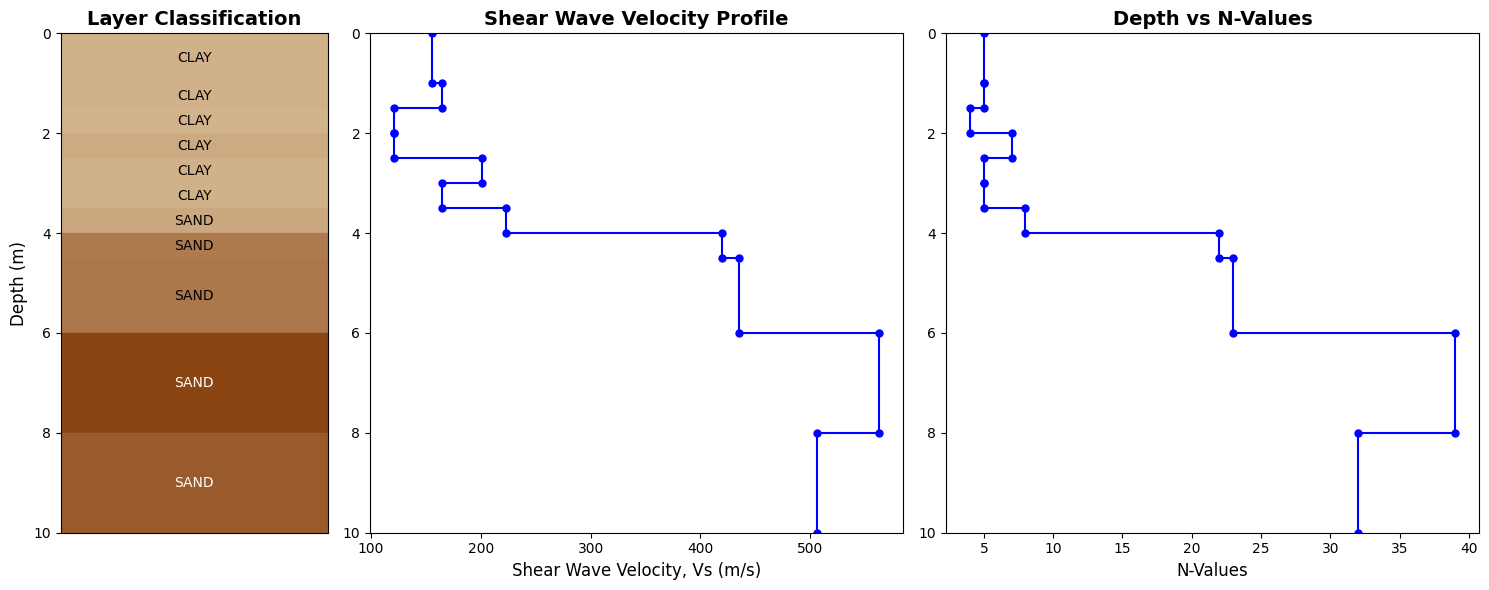

In [3]:
##################################################
# PLOT LAYER CLASSIFICATION, SHEAR WAVE, N-VALUE #
##################################################

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import csv
from io import StringIO

def get_contrast_text_color(rgb_color):
    """
    Returns 'white' if the color is dark and 'black' if the color is light.
    
    Parameters:
      rgb_color: tuple of (r, g, b) values in the range 0-1.
    """
    brightness = 0.299 * rgb_color[0] + 0.587 * rgb_color[1] + 0.114 * rgb_color[2]
    return "white" if brightness < 0.5 else "black"

def plot_layer_classification(ax, layer_boundaries, layer_n, layer_classification):
    """
    Plots the layer classification as colored blocks along the depth axis.
    The fill color for each layer is determined solely by its N-value using a custom brown gradient.
    
    Parameters:
      ax: The matplotlib axes to draw on.
      layer_boundaries: A list of (top, bottom) depth tuples for each layer.
      layer_n: A list of N-values (one per layer) for color scaling.
      layer_classification: A list of classification strings (e.g., "CLAY" or "SAND")
                            for each layer to annotate.
    """
    # Normalize N-values for the colormap (lower N => lighter, higher N => darker)
    min_n = min(layer_n)
    max_n = max(layer_n)
    norm = mcolors.Normalize(min_n, max_n)
    
    # Create a custom brown colormap from light brown to dark brown.
    brown_cmap = LinearSegmentedColormap.from_list("brown_shades", ["#d2b48c", "#8B4513"])
    
    for (top, bottom), n_val, classification in zip(layer_boundaries, layer_n, layer_classification):
        # Get the fill color based on the normalized N-value
        layer_color = brown_cmap(norm(n_val))
        # Fill the layer with the color (no edgecolor to create a continuous contour)
        ax.fill_betweenx([top, bottom], 0, 1, color=layer_color)
        # Choose text color based on background brightness
        text_color = get_contrast_text_color(layer_color)
        mid_depth = (top + bottom) / 2
        ax.text(0.5, mid_depth, classification, fontsize=10, ha='center', va='center', color=text_color)
    
    overall_top = layer_boundaries[0][0]
    overall_bottom = layer_boundaries[-1][1]
    ax.set_ylim(overall_bottom, overall_top)
    ax.set_xlim(0, 1)
    ax.set_xticks([])
    # Generate y-ticks from the shallowest to deepest (adjust step as needed)
    ax.set_yticks(np.arange(int(overall_top), int(overall_bottom) + 2, 2))
    ax.set_ylabel("Depth (m)", fontsize=12)
    ax.set_title("Layer Classification", fontsize=14, fontweight='bold')

def plot_shearwave_velocity(ax, depth, vs):
    """
    Plots the shear wave velocity profile as a step plot.
    
    Parameters:
      ax: The matplotlib axes to draw on.
      depth: A list of depth values (floats).
      vs: A list of shear wave velocity values corresponding to the depths.
    """
    ax.step(vs, depth, where='post', color='blue', linestyle='-', marker='o', markersize=5)
    ax.set_ylim(max(depth), min(depth))
    ax.set_xlabel("Shear Wave Velocity, Vs (m/s)", fontsize=12)
    ax.set_title("Shear Wave Velocity Profile", fontsize=14, fontweight='bold')

def plot_n_values(ax, depth, n_values):
    """
    Plots the N-values as a step plot.
    
    Parameters:
      ax: The matplotlib axes to draw on.
      depth: A list of depth values (floats).
      n_values: A list of N-values corresponding to the depths.
    """
    ax.step(n_values, depth, where='post', color='blue', linestyle='-', marker='o', markersize=5)
    ax.set_ylim(max(depth), min(depth))
    ax.set_xlabel("N-Values", fontsize=12)
    ax.set_title("Depth vs N-Values", fontsize=14, fontweight='bold')

def main():
    # Assumes that 'csv_content' has been defined in a previous cell.
    csv_file = StringIO(csv_content)
    reader = csv.DictReader(csv_file)
    csv_rows = list(reader)
    
    # Create lists for the step plots (all data points)
    depth_all = [float(row["Depth"]) for row in csv_rows]
    vs_all = [float(row["Vs"]) for row in csv_rows]
    n_all = [float(row["N"]) for row in csv_rows]
    
    # For the layer classification plot, assume each layer is defined by two rows.
    # Build a list of layer boundaries (tuple of (top, bottom)), layer N-values, and classifications.
    layer_boundaries = []
    layer_n = []
    layer_classification = []
    for i in range(0, len(csv_rows), 2):
        top = float(csv_rows[i]["Depth"])
        bottom = float(csv_rows[i+1]["Depth"])
        layer_boundaries.append((top, bottom))
        layer_n.append(float(csv_rows[i]["N"]))  # Assuming both rows in a layer have the same N-value.
        layer_classification.append(csv_rows[i]["Classification"])
    
    # Create a figure with three subplots.
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 2, 2]})
    
    # Plot each component:
    plot_layer_classification(axes[0], layer_boundaries, layer_n, layer_classification)
    plot_shearwave_velocity(axes[1], depth_all, vs_all)
    plot_n_values(axes[2], depth_all, n_all)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

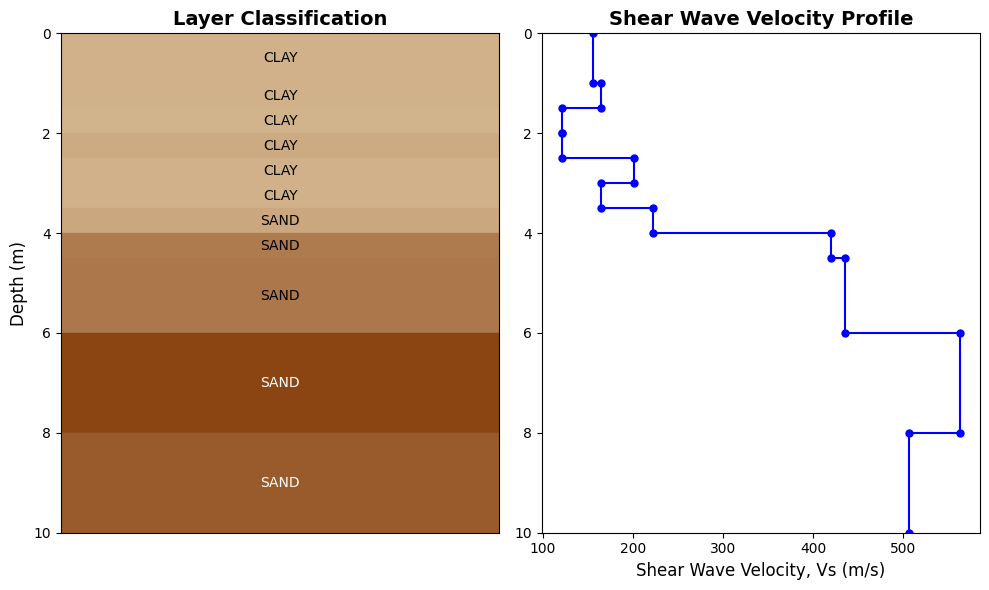

In [7]:
##################################################
# PLOT LAYER CLASSIFICATION, SHEAR WAVE
##################################################

def get_contrast_text_color(rgb_color):
    brightness = 0.299 * rgb_color[0] + 0.587 * rgb_color[1] + 0.114 * rgb_color[2]
    return "white" if brightness < 0.5 else "black"

def plot_layer_classification(ax, layer_boundaries, layer_n, layer_classification):
    min_n = min(layer_n)
    max_n = max(layer_n)
    norm = mcolors.Normalize(min_n, max_n)
    brown_cmap = LinearSegmentedColormap.from_list("brown_shades", ["#d2b48c", "#8B4513"])
    
    for (top, bottom), n_val, classification in zip(layer_boundaries, layer_n, layer_classification):
        layer_color = brown_cmap(norm(n_val))
        ax.fill_betweenx([top, bottom], 0, 1, color=layer_color)
        text_color = get_contrast_text_color(layer_color)
        mid_depth = (top + bottom) / 2
        ax.text(0.5, mid_depth, classification, fontsize=10, ha='center', va='center', color=text_color)
    
    overall_top = layer_boundaries[0][0]
    overall_bottom = layer_boundaries[-1][1]
    ax.set_ylim(overall_bottom, overall_top)
    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticks(np.arange(int(overall_top), int(overall_bottom) + 2, 2))
    ax.set_ylabel("Depth (m)", fontsize=12)
    ax.set_title("Layer Classification", fontsize=14, fontweight='bold')

def plot_shearwave_velocity(ax, depth, vs):
    ax.step(vs, depth, where='post', color='blue', linestyle='-', marker='o', markersize=5)
    ax.set_ylim(max(depth), min(depth))
    ax.set_xlabel("Shear Wave Velocity, Vs (m/s)", fontsize=12)
    ax.set_title("Shear Wave Velocity Profile", fontsize=14, fontweight='bold')

# Parse CSV data from the global csv_content.
csv_file = StringIO(csv_content)
reader = csv.DictReader(csv_file)
csv_rows = list(reader)

# Build data for layer classification.
layer_boundaries = []
layer_n = []
layer_classification = []
for i in range(0, len(csv_rows), 2):
    top = float(csv_rows[i]["Depth"])
    bottom = float(csv_rows[i+1]["Depth"])
    layer_boundaries.append((top, bottom))
    layer_n.append(float(csv_rows[i]["N"]))
    layer_classification.append(csv_rows[i]["Classification"])

# Build data for shear wave velocity profile.
depth_all = [float(row["Depth"]) for row in csv_rows]
vs_all = [float(row["Vs"]) for row in csv_rows]

# Create figure with two subplots side by side.
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
plot_layer_classification(axes[0], layer_boundaries, layer_n, layer_classification)
plot_shearwave_velocity(axes[1], depth_all, vs_all)
plt.tight_layout()
plt.show()


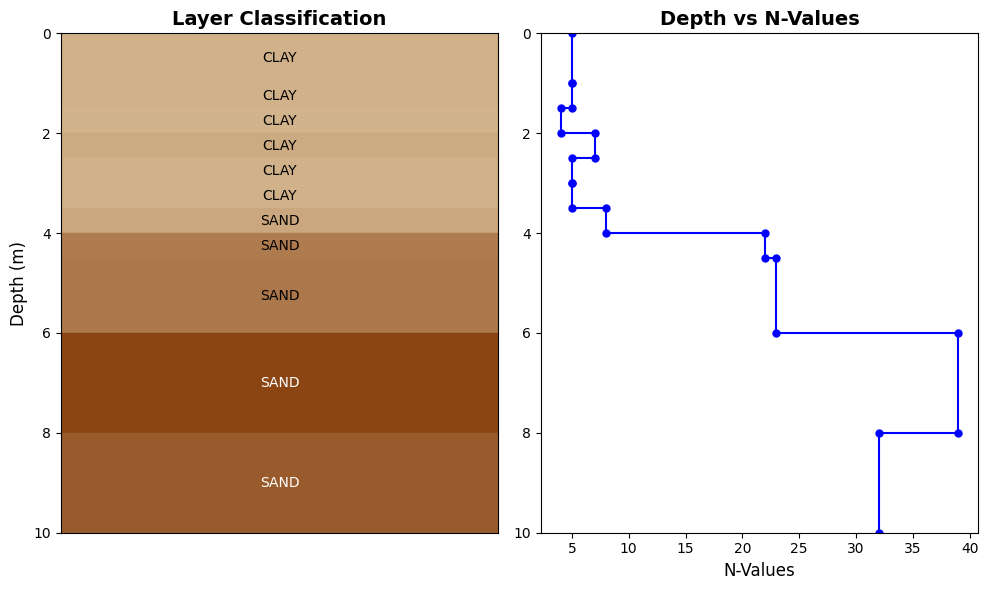

In [8]:
##################################################
# PLOT LAYER CLASSIFICATION, N-VALUE
##################################################

def get_contrast_text_color(rgb_color):
    brightness = 0.299 * rgb_color[0] + 0.587 * rgb_color[1] + 0.114 * rgb_color[2]
    return "white" if brightness < 0.5 else "black"

def plot_layer_classification(ax, layer_boundaries, layer_n, layer_classification):
    min_n = min(layer_n)
    max_n = max(layer_n)
    norm = mcolors.Normalize(min_n, max_n)
    brown_cmap = LinearSegmentedColormap.from_list("brown_shades", ["#d2b48c", "#8B4513"])
    
    for (top, bottom), n_val, classification in zip(layer_boundaries, layer_n, layer_classification):
        layer_color = brown_cmap(norm(n_val))
        ax.fill_betweenx([top, bottom], 0, 1, color=layer_color)
        text_color = get_contrast_text_color(layer_color)
        mid_depth = (top + bottom) / 2
        ax.text(0.5, mid_depth, classification, fontsize=10, ha='center', va='center', color=text_color)
    
    overall_top = layer_boundaries[0][0]
    overall_bottom = layer_boundaries[-1][1]
    ax.set_ylim(overall_bottom, overall_top)
    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticks(np.arange(int(overall_top), int(overall_bottom) + 2, 2))
    ax.set_ylabel("Depth (m)", fontsize=12)
    ax.set_title("Layer Classification", fontsize=14, fontweight='bold')

def plot_n_values(ax, depth, n_values):
    ax.step(n_values, depth, where='post', color='blue', linestyle='-', marker='o', markersize=5)
    ax.set_ylim(max(depth), min(depth))
    ax.set_xlabel("N-Values", fontsize=12)
    ax.set_title("Depth vs N-Values", fontsize=14, fontweight='bold')

# Parse CSV data from the global csv_content.
csv_file = StringIO(csv_content)
reader = csv.DictReader(csv_file)
csv_rows = list(reader)

# Build data for layer classification.
layer_boundaries = []
layer_n = []
layer_classification = []
for i in range(0, len(csv_rows), 2):
    top = float(csv_rows[i]["Depth"])
    bottom = float(csv_rows[i+1]["Depth"])
    layer_boundaries.append((top, bottom))
    layer_n.append(float(csv_rows[i]["N"]))
    layer_classification.append(csv_rows[i]["Classification"])

# Build data for depth vs N-values.
depth_all = [float(row["Depth"]) for row in csv_rows]
n_all = [float(row["N"]) for row in csv_rows]

# Create figure with two subplots side by side.
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
plot_layer_classification(axes[0], layer_boundaries, layer_n, layer_classification)
plot_n_values(axes[1], depth_all, n_all)
plt.tight_layout()
plt.show()
